In [1]:
from hydra import initialize, compose
from pathlib import Path
import pandas as pd
import json
from collections import defaultdict
from tqdm import tqdm
from rdkit import Chem
from rdkit.Chem import Draw, AllChem
from IPython.display import display, SVG

In [2]:
with initialize(version_base=None, config_path="../configs/filepaths"):
    filepaths = compose(config_name="base")

In [3]:
with open(Path(filepaths.data) / "sprhea" / "v3_folded_pt_ns.json") as f:
    obs_rxns = json.load(f)

with open(Path(filepaths.data) / "sprhea" / "v3_folded_pt_ns_arc_unobserved_reactions.json") as f:
    unobs_rxns = json.load(f)

obs_pairs = pd.read_csv(Path(filepaths.data) / "sprhea" / "v3_folded_pt_ns.csv", sep='\t')
neg_pairs = pd.read_csv(Path(filepaths.data) / "sprhea" / "v3_folded_pt_ns_arc_negative_samples.csv", sep='\t')

In [8]:
n_pos_pairs = 0
for idx, row in tqdm(obs_pairs.iterrows(), total=len(obs_pairs)):
    rxn_ids = row['Label']
    for rxn_id in rxn_ids.split(';'):
        n_pos_pairs += 1

n_neg_pairs = 0
for idx, row in tqdm(neg_pairs.iterrows(), total=len(neg_pairs)):
    rxn_ids = row['Label']
    for rxn_id in rxn_ids.split(';'):
        n_neg_pairs += 1

print(f"Number of observed reaction pairs found: {n_pos_pairs}")
print(f"Number of unobserved reaction pairs found: {n_neg_pairs}")
print(f"Total observed reacitons: {len(obs_rxns)}")
print(f"Total ARC negative reactions: {len(unobs_rxns)}")
print(f"Total enzymes: {len(obs_pairs['Entry'].unique())}")

100%|██████████| 21414/21414 [00:00<00:00, 34048.89it/s]

Number of observed reaction pairs found: 49071
Number of unobserved reaction pairs found: 431482
Total observed reacitons: 6460
Total ARC negative reactions: 69832
Total enzymes: 24523


In [6]:
6460+69832

76292

In [6]:
obs_pairs.head()

,Entry,Label,Sequence
0,P0A6W3,1123,MLVWLAEHLVKYYSGFNVFSYLTFRAIVSLLTALFISLWMGPRMIA...
1,P9WMW7,1123,MRQILIAVAVAVTVSILLTPVLIRLFTKQGFGHQIREDGPPSHHTK...
2,O66465,1123,MLYQLALLLKDYWFAFNVLKYITFRSFTAVLIAFFLTLVLSPSFIN...
3,Q8MJ30,3097;7946,MAAAAAGEARRVLVYGGRGALGSRCVQAFRARNWWVASIDVVENEE...
4,P38489,3097;7946,MDIISVALKRHSTKAFDASKKLTPEQAEQIKTLLQYSPSSTNSQPW...


In [19]:
obs_unobs_pairs = defaultdict(set)
obs_obs_pairs = defaultdict(set)
for k, v in tqdm(obs_rxns.items(), total=len(obs_rxns)):
    sma = v['smarts']
    lhs = sma.split('>>')[0]
    for k2, v2 in unobs_rxns.items():
        sma2 = v2['smarts']
        lhs2 = sma2.split('>>')[0]
        if lhs == lhs2 and v['min_rules'] == v2['min_rules']:
            obs_unobs_pairs[k].add(k2)

    for k2, v2 in obs_rxns.items():
        if k == k2:
            continue
        sma2 = v2['smarts']
        lhs2 = sma2.split('>>')[0]
        if lhs == lhs2 and v['min_rules'] == v2['min_rules']:
            obs_obs_pairs[k].add(k2)

  0%|          | 0/6460 [00:00<?, ?it/s]

100%|██████████| 6460/6460 [03:47<00:00, 28.45it/s]


In [20]:
print(len(obs_unobs_pairs))
print(len(obs_obs_pairs))

5268
235


In [25]:
obs_w_both = list(set(obs_unobs_pairs.keys()).intersection(set(obs_obs_pairs.keys())))
print(len(obs_w_both))

205


In [70]:
i = 0

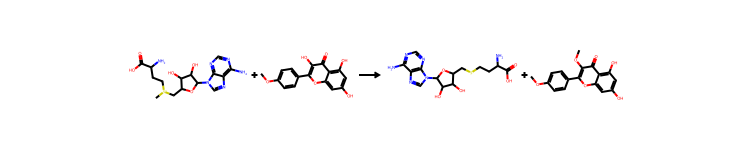

14992


In [138]:
rxn = obs_rxns[obs_w_both[i]]['smarts']
display(
    AllChem.ReactionFromSmarts(rxn, useSmiles=True)
)
print(obs_w_both[i])
i+=1

In [ ]:
'''
1420
13552
2994
'''

original reaction:


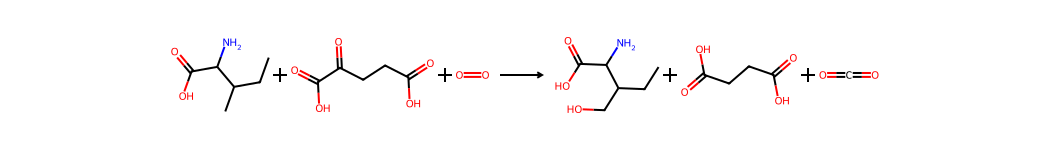


negative pairs with unobserved reactions:


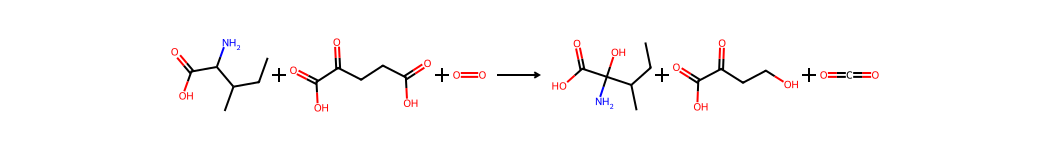

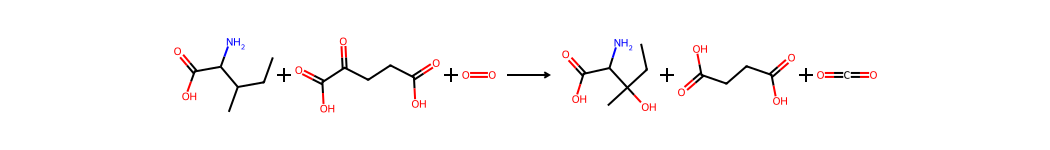

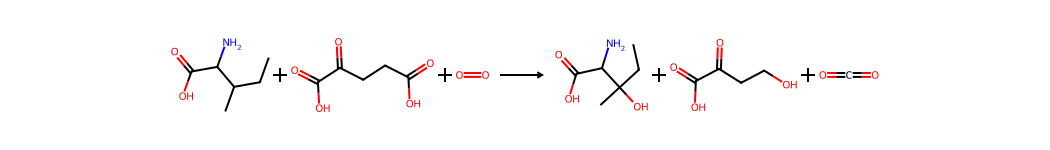

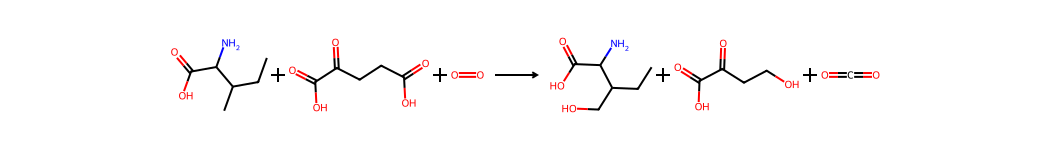

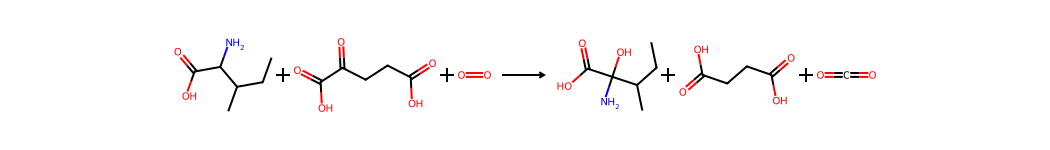

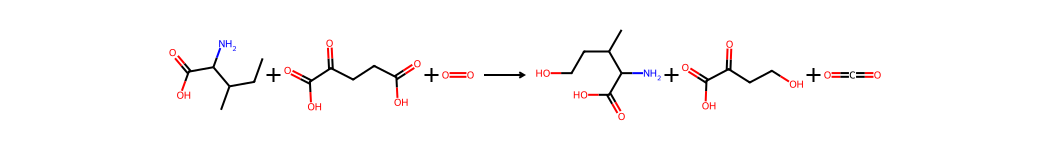

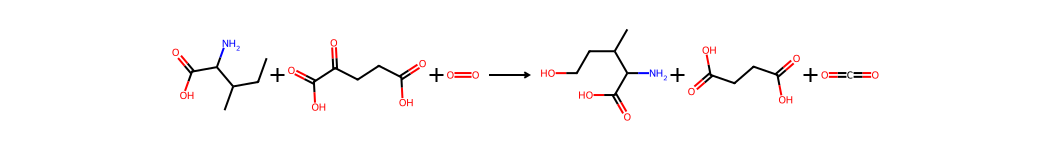

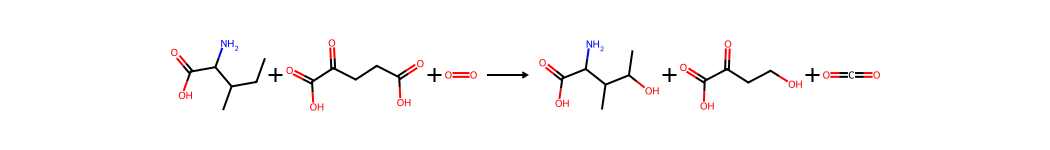


negative pairs with observed reactions:
12958


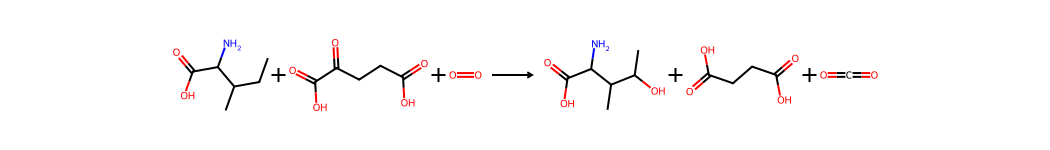

In [160]:
k = '13552'
_unobs = obs_unobs_pairs[k]
_obs = obs_obs_pairs[k]
print("original reaction:")
display(AllChem.ReactionFromSmarts(obs_rxns[k]['smarts'], useSmiles=True))
print("\nnegative pairs with unobserved reactions:")
for u in list(_unobs)[:10]:
    display(AllChem.ReactionFromSmarts(unobs_rxns[u]['smarts'], useSmiles=True))
print("\nnegative pairs with observed reactions:")
for o in list(_obs)[:3]:
    print(o)
    display(AllChem.ReactionFromSmarts(obs_rxns[o]['smarts'], useSmiles=True))

In [155]:
# Get examples of neg pairs with observed reaction
this_rxn_enzymes = set()
that_rxn_enzymes = set()
this_rxn = '13552'
that_rxn = '12958'

for _, row in obs_pairs.iterrows():
    pid = row['Entry']
    rids = row['Label'].split(';')
    for rid in rids:
        if rid == this_rxn:
            this_rxn_enzymes.add(pid)
        if rid == that_rxn:
            that_rxn_enzymes.add(pid)
    


In [156]:
this_rxn_enzymes, that_rxn_enzymes

({'A0A0H3L1B8'}, {'E2GIN1'})

In [157]:
this_negs = that_rxn_enzymes - this_rxn_enzymes
that_negs = this_rxn_enzymes - that_rxn_enzymes
print(this_negs)
print(that_negs)
assert len(this_negs & that_negs) == 0

{'E2GIN1'}
{'A0A0H3L1B8'}


In [158]:
obs_rxns['13552']['rhea_ids']

[63873, 63874]

In [159]:
obs_rxns['12958']['rhea_ids']

[41449, 41450]

In [8]:
# Get examples of neg pairs with unobserved reactions

In [ ]:
# Get example of obs reactions that yielded obs and unobs neg pairs